<a href="https://colab.research.google.com/github/allefa/concurso-Ciencia-de-Dados/blob/main/concurso_data_sciennce_t2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#arrumando o banco de dados 


In [1]:
import pandas as pd 
import seaborn as sns 

**importando o banco de dados**

In [2]:
df = pd.read_csv("http://www.educacao.pr.gov.br/sites/default/arquivos_restritos/files/documento/2021-11/edutech_comparativos_metricas.csv",sep=";")
df.head(5)

,Ano Censo,Número de Vagas Oferecidas,Número de Tipo de Ingressos,Número de Matrículas,Número de Concluintes,Número de Inscritos,Número de Cursos,Nome Região
0,2017,6075252.0,2135126.0,6529681,947606,14605840.0,33522.0,BRASIL
1,2017,554885.0,208370.0,607357,89956,1306750.0,3072.0,CENTRO-OESTE
2,2017,1138928.0,441493.0,1447248,188730,3804497.0,6715.0,NORDESTE
3,2017,383771.0,143622.0,473716,64851,1367659.0,2513.0,NORTE
4,2017,3086636.0,1026159.0,3003075,458824,6516557.0,14861.0,SUDESTE


**substituindo NaN por 0**

In [3]:
df.fillna(value=0,inplace=True)

**renomeando colunas e seus valores para facilitar a analise**

In [4]:
colunas = {"Ano Censo":"ano_censo","Número de Vagas Oferecidas":"numero_de_vagas_oferecidas","Número de Tipo de Ingressos":"numero_de_tipo_de_ingressos",
	        "Número de Matrículas":"numero_de_matriculas","Número de Concluintes":"numero_de_concluintes",
          "Número de Inscritos":"numero_de_inscritos","Número de Cursos":"numero_de_cursos","Nome Região":"nome_regiao"}
df.rename(columns=colunas,inplace=True)

In [5]:
regioes = {'BRASIL':'brasil', 'CENTRO-OESTE':'centro-oeste', 'NORDESTE':'nordeste', 'NORTE':'norte', 'SUDESTE':'sudeste', 'SUL':'sul',
       '* EXTERIOR':'exterior'}
df["nome_regiao"] = df["nome_regiao"].map(regioes)

In [ ]:
df.sample(3)

,ano_censo,numero_de_vagas_oferecidas,numero_de_tipo_de_ingressos,numero_de_matriculas,numero_de_concluintes,numero_de_inscritos,numero_de_cursos,nome_regiao
5,2017,911032.0,315482.0,998285,145245,1610377.0,6361.0,sul
56,2009,471865.0,273166.0,865936,136337,791152.0,5386.0,sul
9,2016,416474.0,203649.0,473479,70367,1397271.0,2475.0,norte


#fazendo os graficos e as analises 

**Informando as taxas de crescimento ou decaimento de matriculas ano a ano para todas as regiões do Brasil**

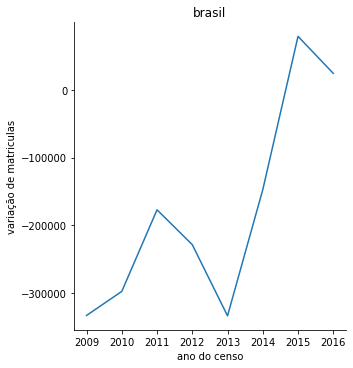

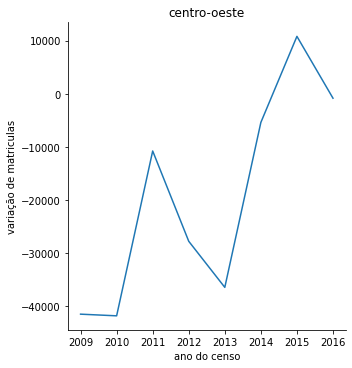

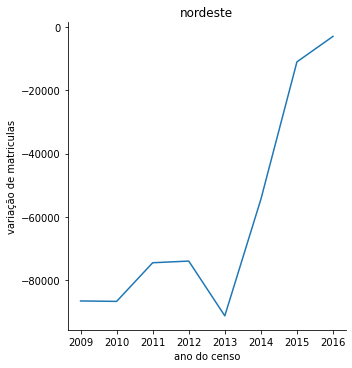

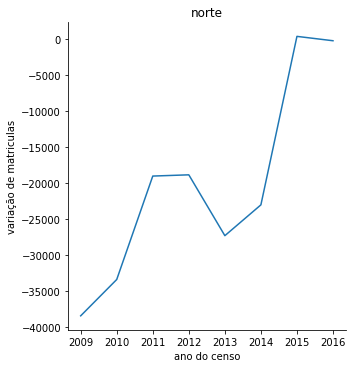

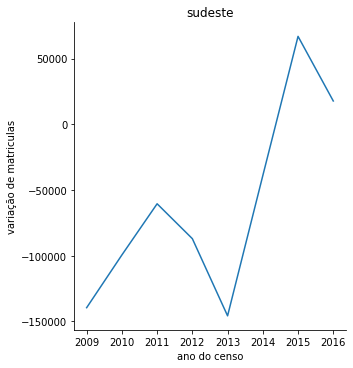

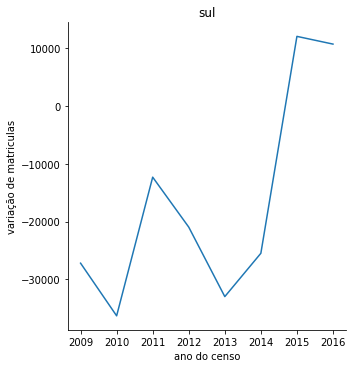

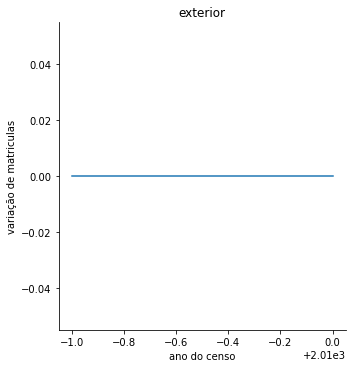

In [ ]:
for n in df["nome_regiao"].unique():
  selecao = df.query("nome_regiao == @n")
  g1 = sns.relplot(data=selecao,x="ano_censo",y=selecao["numero_de_matriculas"].diff(),kind="line", col_order=2,row_order=2)
  g1.set(xlabel='ano do censo',
        ylabel="variação de matriculas",title=n)
#analisando o gráfico temos uma queda expressiva no número de matriculas nos anos de 2012 e 2013 em todas as regiões
#após essa queda temos um crescimento nas matriculas 
#centro-oeste e sudeste temos uma queda em 2016 e no nordeste um crescimento 

**Informando o número de vagas oferecidas por região ano a ano**

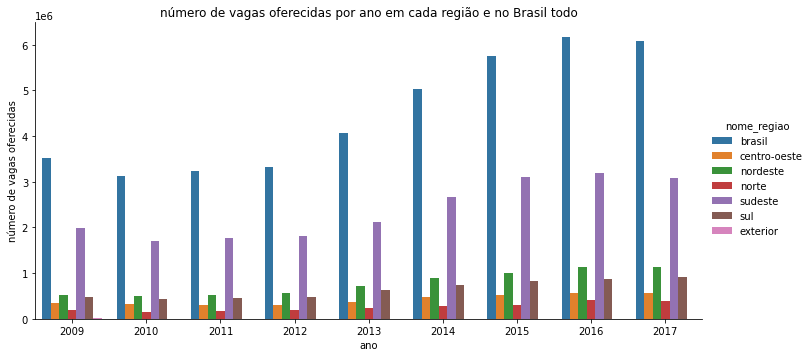

In [50]:
g = sns.catplot(data=df,x="ano_censo",y="numero_de_vagas_oferecidas",hue="nome_regiao",kind="bar",aspect=2)
g.set(ylabel="número de vagas oferecidas",
      xlabel = "ano",
      title="número de vagas oferecidas por ano em cada região e no Brasil todo")
#analisando o gráfico vemos um crescimento quase constante no número de vagas oferecidas, tendo algumas quedas entre 2010 e 2012

In [ ]:
df.sample(5)

,ano_censo,numero_de_vagas_oferecidas,numero_de_tipo_de_ingressos,numero_de_matriculas,numero_de_concluintes,numero_de_inscritos,numero_de_cursos,nome_regiao
53,2009,515028.0,294711.0,965502,130829,1508888.0,4655.0,nordeste
30,2012,3324407.0,2204456.0,5923838,876091,10927775.0,30862.0,brasil
22,2014,2659977.0,1181028.0,3048811,410939,6081265.0,14451.0,sudeste
17,2015,837134.0,378798.0,1021149,140158,1784979.0,6187.0,sul
26,2013,723326.0,425104.0,1287552,149370,3156889.0,5709.0,nordeste


**Avaliando se com o aumento das vagas, existem um maior número de ingressos**

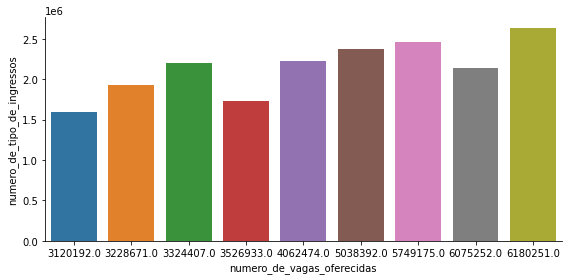

In [16]:
selecao = df.query("nome_regiao =='brasil'")
sns.catplot(data=selecao,x="numero_de_vagas_oferecidas",y="numero_de_tipo_de_ingressos",kind="bar",aspect=2,height=4)
#o gráfico a seguir nos mostra que, no geral, temos um aumento no tipo de ingresos quando as vagas aumentam 

In [13]:
selecao.head(3)

,ano_censo,numero_de_vagas_oferecidas,numero_de_tipo_de_ingressos,numero_de_matriculas,numero_de_concluintes,numero_de_inscritos,numero_de_cursos,nome_regiao
0,2017,6075252.0,2135126.0,6529681,947606,14605840.0,33522.0,brasil
6,2016,6180251.0,2632500.0,6554283,938732,14407344.0,32959.0,brasil
12,2015,5749175.0,2465751.0,6633545,916363,15024188.0,32294.0,brasil


**Informando o número de concluintes em cada região e apontando qual é a região com maior dificuldade**

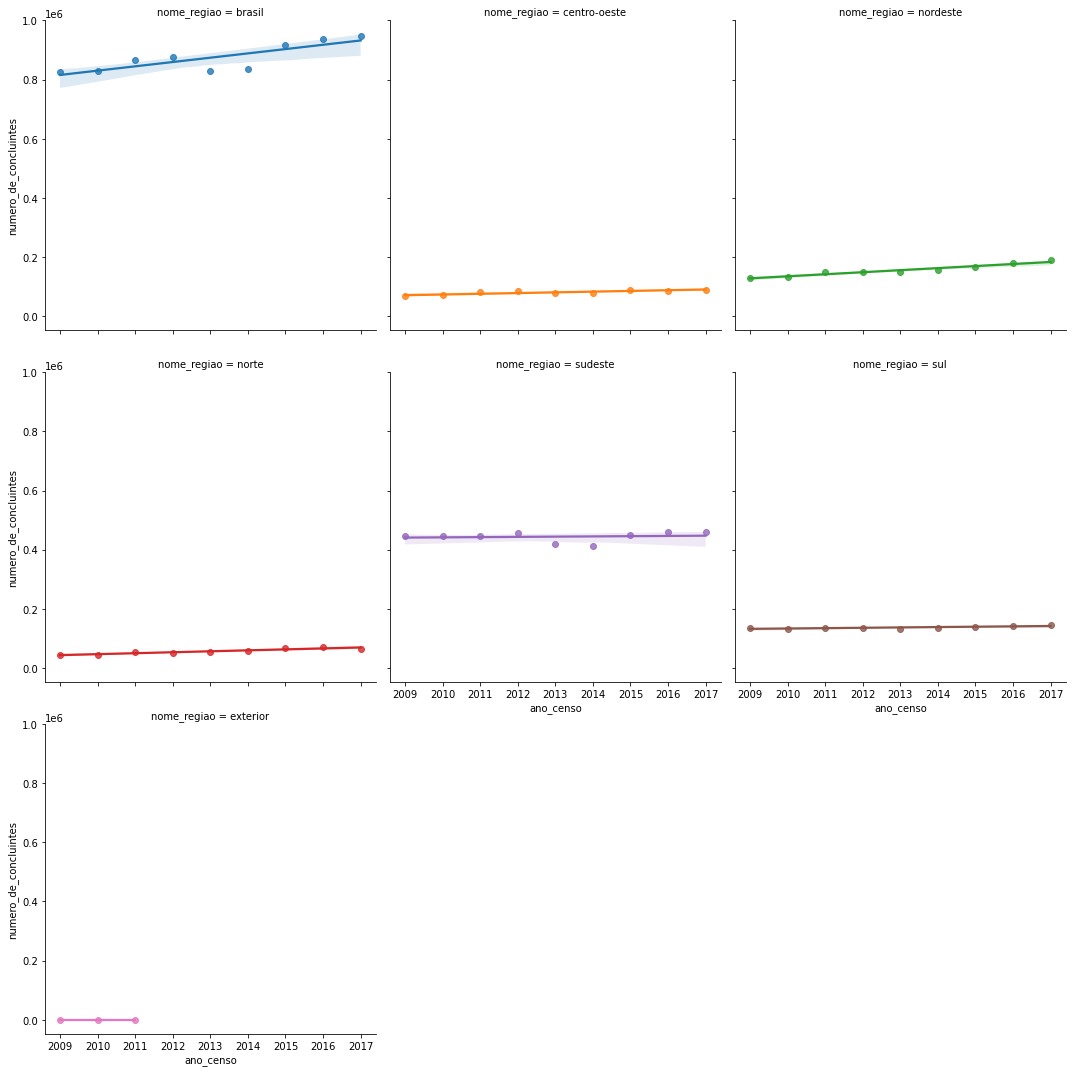

In [31]:
sns.lmplot(data=df,x="ano_censo",y="numero_de_concluintes",hue="nome_regiao",aspect=1
            ,col="nome_regiao",col_wrap=3)
#sudeste é a região com maior dificuldade no quesito de concluintes 

**Analisando comparativamente o número de inscritos com o número de matrículas**

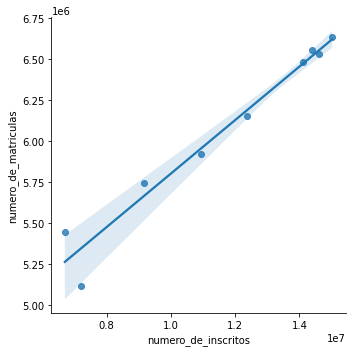

In [36]:
selecao = df.query("nome_regiao =='brasil'")
sns.lmplot(data=selecao,x="numero_de_inscritos",y="numero_de_matriculas")
#as matriculas aumentam junto com os inscritos

**Verificando se o número de cursos ofertados na região impactam no aumento de inscritos e/ou número de matrículas**

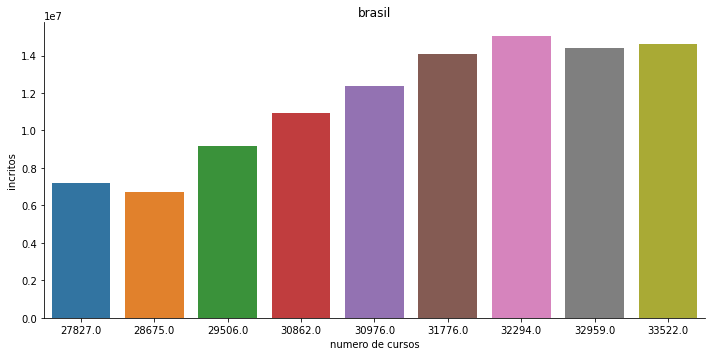

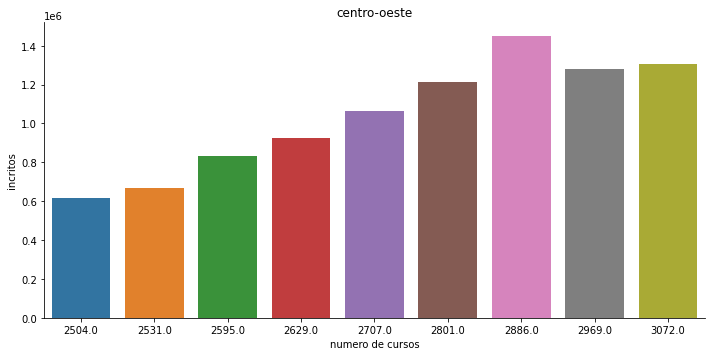

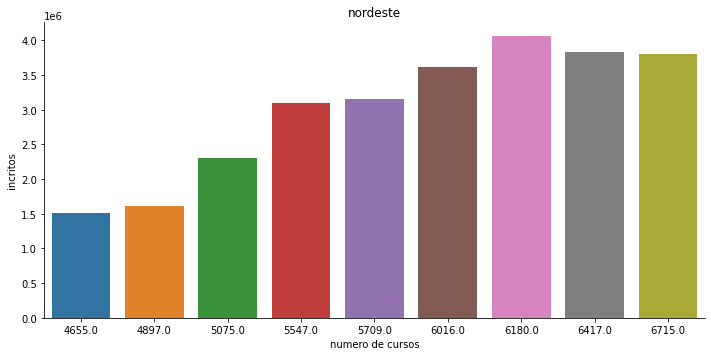

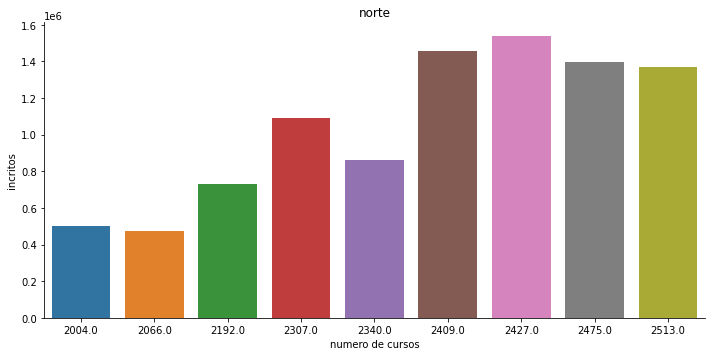

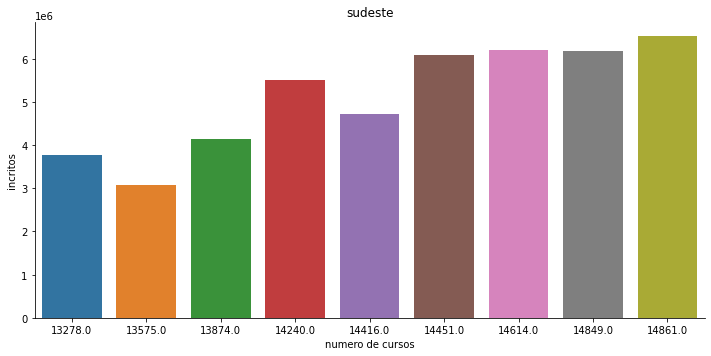

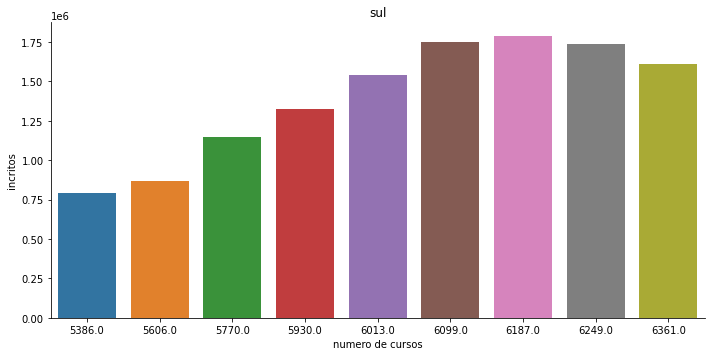

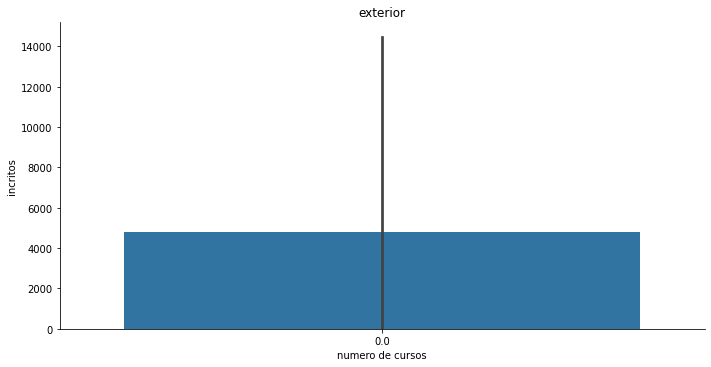

In [46]:
for n in df["nome_regiao"].unique():
  selecao = df.query("nome_regiao == @n")
  g1 = sns.catplot(data=selecao,x="numero_de_cursos",y="numero_de_inscritos",kind="bar", col_order=2,row_order=2,aspect=2)
  g1.set(xlabel='numero de cursos',
        ylabel="incritos",title=n)

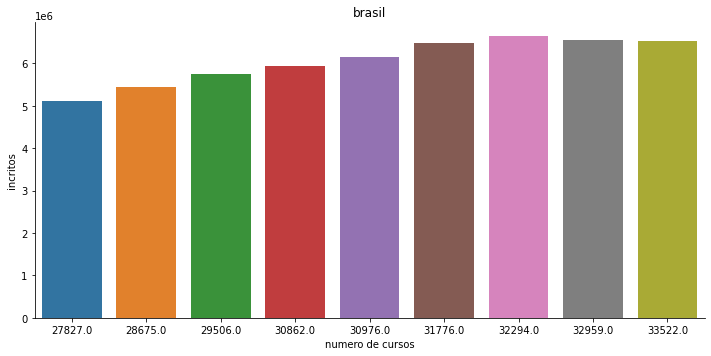

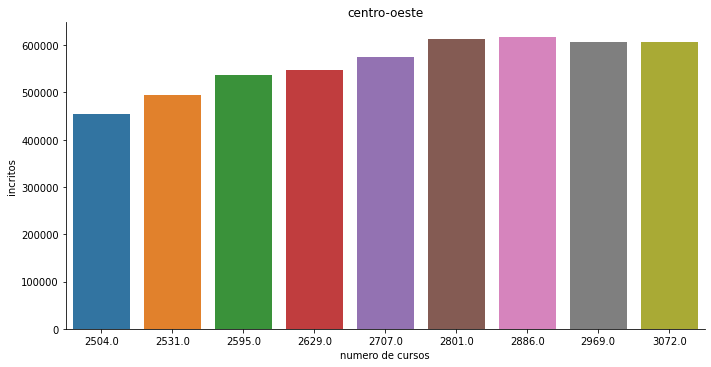

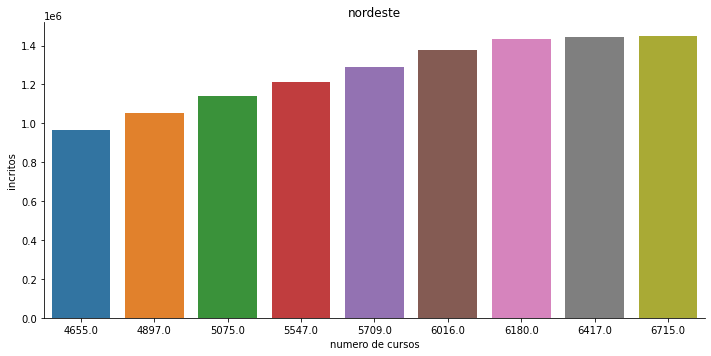

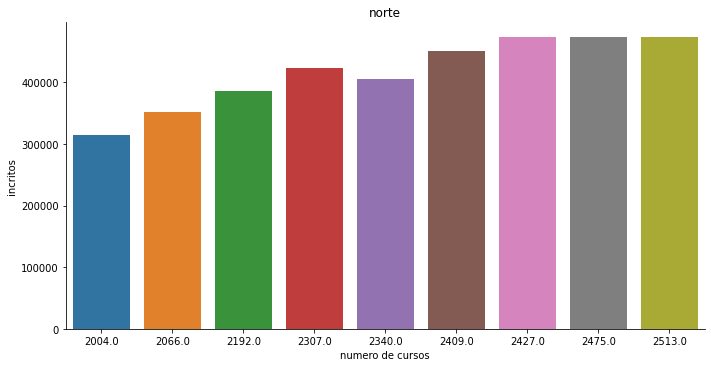

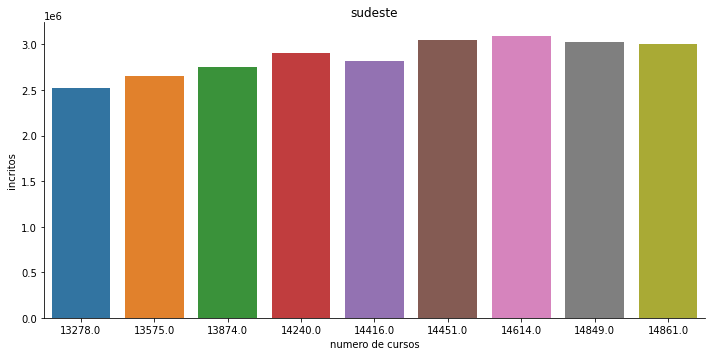

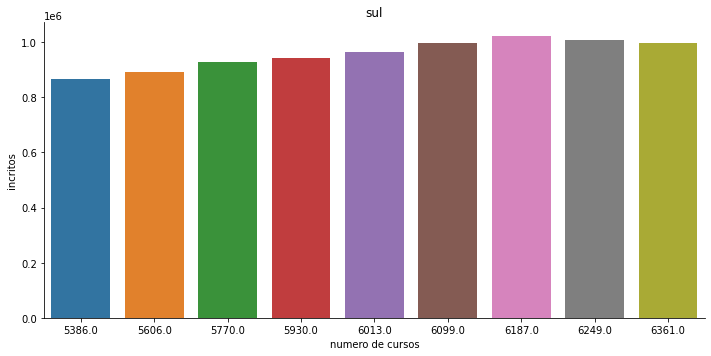

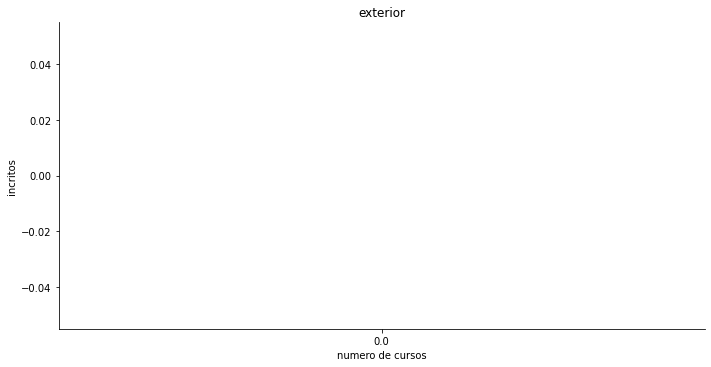

In [51]:
for n in df["nome_regiao"].unique():
  selecao = df.query("nome_regiao == @n")
  g1 = sns.catplot(data=selecao,x="numero_de_cursos",y="numero_de_matriculas",kind="bar", col_order=2,row_order=2,aspect=2)
  g1.set(xlabel='numero de cursos',
        ylabel="incritos",title=n)

In [ ]:
#o aumento no número de cursos impacta diretamente tanto no número de inscritos quanto no de matriculas